<a href="https://colab.research.google.com/github/manjirikulkarni03/Play-store-app-review-analysis/blob/main/Copy_of_EDA(Play_Store_Review)(Common_Team_Colab)_MK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#**Data Cleaning**

In [ ]:
# Mounting the drive to access our dataset.
df_data= pd.read_csv("/content/drive/MyDrive/Play Store App Review Analysis/Play Store Data.csv")
df_reviews= pd.read_csv("/content/drive/MyDrive/Play Store App Review Analysis/User Reviews.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Checking first 5 rows of the playstore dataset.
df_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
448,Burner - Free Phone Number,COMMUNICATION,4.3,14873,Varies with device,"1,000,000+",Free,0,Everyone,Communication,"July 12, 2018",Varies with device,Varies with device
9598,Punch em,GAME,4.1,2208,4.4M,"500,000+",Free,0,Everyone,Arcade,"May 24, 2018",2.0.8,4.1 and up
485,"Hily: Dating, Chat, Match, Meet & Hook up",DATING,4.1,2556,56M,"100,000+",Free,0,Mature 17+,Dating,"August 1, 2018",2.5.2,4.1 and up
4668,Berlin Subway – BVG U-Bahn & S-Bahn map and ro...,MAPS_AND_NAVIGATION,4.4,509,17M,"100,000+",Free,0,Everyone,Maps & Navigation,"June 6, 2018",1.0.7,5.0 and up


In [ ]:
# Checking first 5 rows of the user reviews dataset.
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
48892,Free Book Reader,NaN,NaN,NaN,NaN
22518,Calorie Counter by FatSecret,NaN,NaN,NaN,NaN
52659,Garena Free Fire,Game lagging lot since last update. Booyah dev...,Negative,-0.033333,0.373333
2803,AMC Theatres,NaN,NaN,NaN,NaN
2222,A+ Gallery - Photos & Videos,NaN,NaN,NaN,NaN


In [ ]:
# Checking the maximum rows and columns available in our datasets.
df_data.shape, df_reviews.shape

((10841, 13), (64295, 5))

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Determining duplicate values in our play store dataset.
df_data.duplicated().sum()

483

In [ ]:
# Determining duplicate values in our user review dataset.
df_reviews.duplicated().sum()

33616

In [ ]:
# Dropping the duplicate values from both the datasets.
df_non_dup_data= df_data.drop_duplicates()

In [ ]:
# Rechecking the shape of our play store dataset after dropping all the duplicates.
df_non_dup_data.shape

(10358, 13)

In [ ]:
#Rechecking our play store dataset wheather they have any more duplicate values.
df_non_dup_data.duplicated().sum()

0

**It's good to know that we don't have more duplicate values in both the dataset but still we have some null and missing values. Let's deal with them.**

In [ ]:
df_data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1013,VAN NIAN 2018 - Vietnamese Calendar,EVENTS,NaN,37,16M,"10,000+",Free,0,Everyone,Events,"November 27, 2017",1.0,4.0 and up
3392,Colorful Glitter Neon Butterfly Keyboard Theme,PERSONALIZATION,4.3,2056,9.8M,"500,000+",Free,0,Everyone,Personalization,"July 25, 2018",6.7.24.2018,4.0.3 and up
2796,Wish - Shopping Made Fun,SHOPPING,4.5,6212081,15M,"100,000,000+",Free,0,Everyone,Shopping,"August 3, 2018",4.20.5,4.1 and up


In [ ]:
# Defining the function 
def get_info(df):
  func_df= pd.DataFrame(index= df.columns, columns=["datatype", "total_values", "na_values", "non_na_values", "%na_values", "unique_count"])
  func_df["datatype"]= [type(i) for i in list(df.columns)]
  func_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  func_df["na_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  func_df["non_na_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  func_df["%na_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)]
  func_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  return func_df

In [ ]:
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10841,0,10841,0.000000,9660
Category,<class 'str'>,10841,0,10841,0.000000,34
Rating,<class 'str'>,10841,1474,9367,13.596532,41
Reviews,<class 'str'>,10841,0,10841,0.000000,6002
Size,<class 'str'>,10841,0,10841,0.000000,462
Installs,<class 'str'>,10841,0,10841,0.000000,22
Type,<class 'str'>,10841,1,10840,0.009224,4
Price,<class 'str'>,10841,0,10841,0.000000,93
Content Rating,<class 'str'>,10841,1,10840,0.009224,7
Genres,<class 'str'>,10841,0,10841,0.000000,120


In [ ]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


We are having total null values in df_non_dup_data dataset is:

*   Rating = 1465
*   Type = 1
*   Content Rating = 1
*   Current Ver = 8
*   Android Ver = 3

Since we have 0.009654%, 0.009654%, 0.077235%, 0.028963% null values in Type, Content Rating, Current Ver, Android Ver columns respectively which won't affect our results, so we can drop them.

Replacing all the null values of "Rating" column with **Mode**. Since we can not drop these values.





In [ ]:
df_non_dup_data.dropna(subset=["Type","Content Rating", "Current Ver", "Android Ver"], inplace= True)

In [ ]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.000000,9648
Category,<class 'str'>,10346,0,10346,0.000000,33
Rating,<class 'str'>,10346,1460,8886,14.111734,40
Reviews,<class 'str'>,10346,0,10346,0.000000,5999
Size,<class 'str'>,10346,0,10346,0.000000,457
Installs,<class 'str'>,10346,0,10346,0.000000,20
Type,<class 'str'>,10346,0,10346,0.000000,2
Price,<class 'str'>,10346,0,10346,0.000000,92
Content Rating,<class 'str'>,10346,0,10346,0.000000,6
Genres,<class 'str'>,10346,0,10346,0.000000,119


In [ ]:
df_non_dup_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8281,DC-014,PHOTOGRAPHY,5.0,3,16M,500+,Free,0,Everyone,Photography,"June 14, 2018",1.0.3,4.1 and up
8670,Dude Perfect 2,GAME,4.5,401648,70M,"10,000,000+",Free,0,Everyone,Action,"April 12, 2017",1.6.1,4.0.3 and up
5204,Lyra Virtual Assistant,PRODUCTIVITY,4.5,41624,3.4M,"1,000,000+",Free,0,Everyone,Productivity,"May 24, 2018",1.2.4,4.0.3 and up
9309,Diário Escola Mestres EF,FAMILY,NaN,11,6.6M,"1,000+",Free,0,Everyone,Education,"July 31, 2018",3.0.18 Fundamental,4.0 and up
4466,Theme Android P Black design for LG V30,PERSONALIZATION,4.4,8,6.2M,100+,Paid,$1.49,Everyone,Personalization,"April 6, 2018",1.1,7.0 and up


In [ ]:
# Checking the mode in our df_non_dup_data rating column of our dataset.
df_non_dup_data["Rating"].mode()

0    4.4
dtype: float64

In [ ]:
# Converting the series object into numpy float type object.
df_non_dup_data["Rating"].mode()[0]

4.4

In [ ]:
df_non_dup_non_na_data= df_non_dup_data.fillna(df_non_dup_data["Rating"].mode()[0])

In [ ]:
#Checking for null values
df_data.isna().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
get_info(df_non_dup_non_na_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.0,9648
Category,<class 'str'>,10346,0,10346,0.0,33
Rating,<class 'str'>,10346,0,10346,0.0,39
Reviews,<class 'str'>,10346,0,10346,0.0,5999
Size,<class 'str'>,10346,0,10346,0.0,457
Installs,<class 'str'>,10346,0,10346,0.0,20
Type,<class 'str'>,10346,0,10346,0.0,2
Price,<class 'str'>,10346,0,10346,0.0,92
Content Rating,<class 'str'>,10346,0,10346,0.0,6
Genres,<class 'str'>,10346,0,10346,0.0,119


**Hurray! We have succesfully removed all the null and duplicate values from our play store dataset. Let us now do the same thing from user review dataset.**

In [ ]:
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
13215,Be A Legend: Soccer,You think funny?.... internet still on... lost...,Positive,0.267857,0.767857
15248,Black White Interracial Dating - Interracial M...,NaN,NaN,NaN,NaN
51028,GANMA! - オリジナル漫画が全話無料で読み放題,This application is useful for those studying ...,Positive,0.285256,0.434615
51173,GMAT Question Bank,Framing sentence Wish memorable year ahead.,Positive,0.500000,1.000000
50072,Frontback - Social Photos,Its brilliant people connect classy touch.. Lo...,Positive,0.446667,0.633333


In [ ]:
df_reviews.shape

(64295, 5)

In [ ]:
df_reviews.duplicated().sum()

33616

In [ ]:
df_non_dup_reviews= df_reviews.drop_duplicates()

In [ ]:
get_info(df_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,64295,0,64295,0.000000,1074
Translated_Review,<class 'str'>,64295,26868,37427,41.788631,27995
Sentiment,<class 'str'>,64295,26863,37432,41.780854,4
Sentiment_Polarity,<class 'str'>,64295,26863,37432,41.780854,5411
Sentiment_Subjectivity,<class 'str'>,64295,26863,37432,41.780854,4475


In [ ]:
get_info(df_non_dup_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,30679,0,30679,0.000000,1074
Translated_Review,<class 'str'>,30679,987,29692,3.217184,27995
Sentiment,<class 'str'>,30679,982,29697,3.200887,4
Sentiment_Polarity,<class 'str'>,30679,982,29697,3.200887,5411
Sentiment_Subjectivity,<class 'str'>,30679,982,29697,3.200887,4475


In [ ]:
df_non_dup_non_na_reviews= df_non_dup_reviews.dropna()

In [ ]:
get_info(df_non_dup_non_na_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,29692,0,29692,0.0,865
Translated_Review,<class 'str'>,29692,0,29692,0.0,27994
Sentiment,<class 'str'>,29692,0,29692,0.0,3
Sentiment_Polarity,<class 'str'>,29692,0,29692,0.0,5410
Sentiment_Subjectivity,<class 'str'>,29692,0,29692,0.0,4474


In [ ]:
df_non_dup_non_na_data.shape, df_non_dup_non_na_reviews.shape

((10346, 13), (29692, 5))

**We have succesfully dropped all the null and duplicated rows from both the datasets.

1.all the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to transform them into a proper data type and

2.also remove the unwanted values from the numerical columns like ‘+’ and ‘,’ from installs and ‘$’ from price.

3.In the size column we have some values in KB and some values in MB, so we transform all the values in MB.**

In [ ]:
# List of characters to remove
list_of_chars = ['+', ',' , '$' ]
# List of column names to clean
list_of_columns = ['Installs', 'Price']

# Loop for each column
for col in list_of_columns:
    # Replace each character with an empty string
    for char in list_of_chars:
        df_non_dup_non_na_data[col] = df_non_dup_non_na_data[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    df_non_dup_non_na_data[col] = pd.to_numeric(df_non_dup_non_na_data[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_non_dup_non_na_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  int64  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
def convert(i):
  if 'k' in i:
    return float(i[:-1])/1024
  elif 'M' in i:
    return float(i[:-1])
  else:
    return 

df_non_dup_non_na_data['Size']=df_non_dup_non_na_data['Size'].apply(convert)

In [ ]:
df_non_dup_non_na_data['Size'] 

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10346, dtype: float64

Now,Let's check correlation between Rating and price.

In [ ]:
df_non_dup_non_na_data[['Rating','Price']]


,Rating,Price
0,4.1,0.0
1,3.9,0.0
2,4.7,0.0
3,4.5,0.0
4,4.3,0.0
...,...,...
10836,4.5,0.0
10837,5.0,0.0
10838,4.4,0.0
10839,4.5,0.0


Below is the distribution of Ratings and price over the dataframe. 

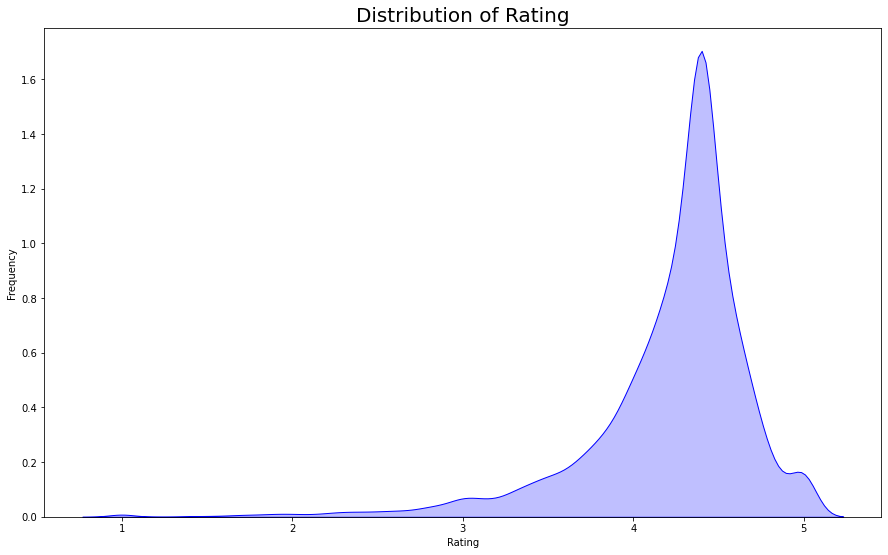

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df_non_dup_non_na_data.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

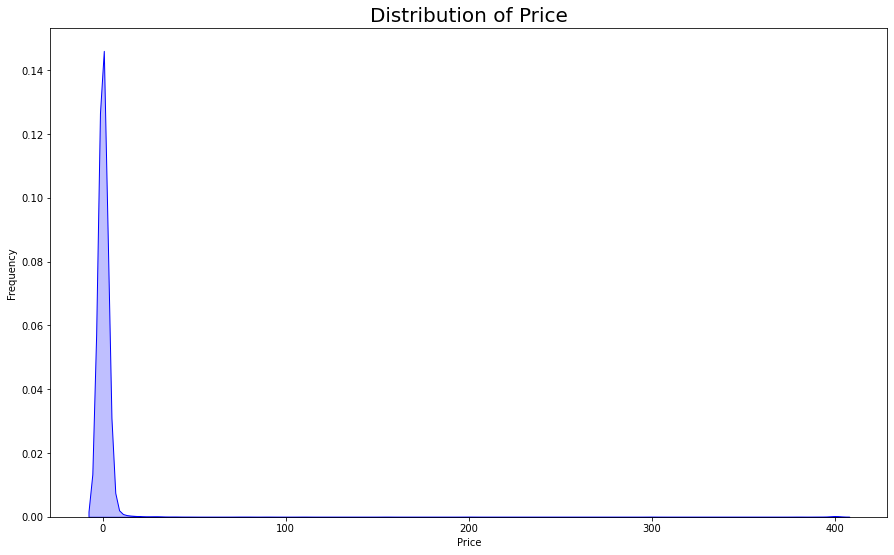

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Price")
plt.ylabel("Frequency")
graph = sns.kdeplot(df_non_dup_non_na_data.Price, color="Blue", shade = True)
plt.title('Distribution of Price',size = 20);

Now, let's have a look at correlation between Ratings and price.

In [ ]:

df_non_dup_non_na_data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: int64

**Which are Top revenue generated apps and what are their corresponding categories.**

First calculate Revenue for each app.which is calulated as,
 Revenue=price*installs

In [ ]:
df_non_dup_non_na_data['Revenue']=df_non_dup_non_na_data['Price']*df_non_dup_non_na_data['Installs']


Now let's calculate Top 10 revenue generated apps.

In [ ]:
df_non_dup_non_na_data_new=df_non_dup_non_na_data.loc[(df_non_dup_non_na_data['Price']!=0) & (df_non_dup_non_na_data['Installs']!=0),['App','Category','Revenue']].sort_values('Revenue',ascending=False).head(10)
df_non_dup_non_na_data_new

,App,Category,Revenue
2241,Minecraft,FAMILY,69900000.0
4347,Minecraft,FAMILY,69900000.0
5351,I am rich,LIFESTYLE,39999000.0
5356,I Am Rich Premium,FINANCE,19999500.0
4034,Hitman Sniper,GAME,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,5990000.0
8804,DraStic DS Emulator,GAME,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,4000000.0


Below are Top 5 revenue generating apps.

In [ ]:
df_non_dup_non_na_data_new.groupby('Category').agg({'Revenue':'max'})

,Revenue
Category,
FAMILY,69900000.0
FINANCE,19999500.0
GAME,9900000.0
LIFESTYLE,39999000.0
PHOTOGRAPHY,5990000.0


Text(0, 0.5, 'Revenue')

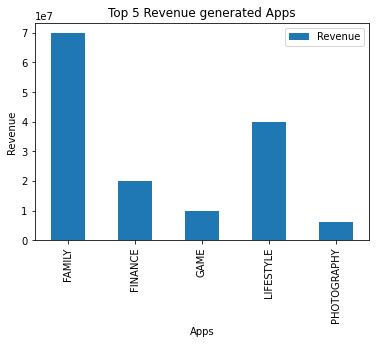

In [ ]:
df_non_dup_non_na_data_new.groupby('Category').agg({'Revenue':'max'}).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Top 5 Revenue generated Apps')
plt.xlabel('Apps')
plt.ylabel('Revenue')

so, with this we can conclude that,

1.Top 5 revenue generated apps are FAMILY, FINANCE, GAME,LIFESTYLE  and PHOTOGRAPHY.

2.Highet revenue is generated from FAMILY App.

3.Lowest revenue is generated by PHOTOGRAPHY App.

How Installs and Rating are correlated?

Text(0.5, 1.0, 'Installs per Rating')

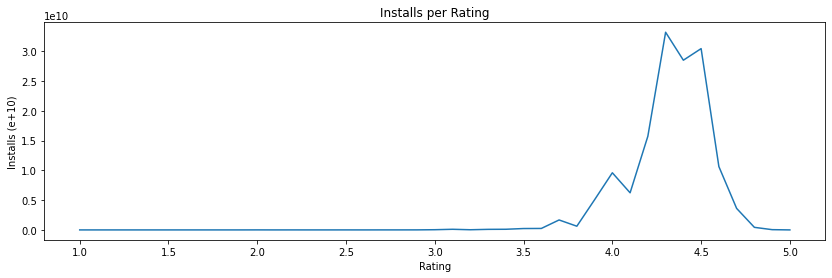

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_rating=df_non_dup_non_na_data.groupby('Rating').sum().reset_index()
fig, axes	= plt.subplots(figsize=(14,4))
plt.plot(df_rating['Rating'],df_rating['Installs'])
axes.set_xlabel('Rating')
axes.set_ylabel('Installs (e+10)')
axes.set_title('Installs per Rating')

Text(0.5, 1.0, 'Price per Rating')

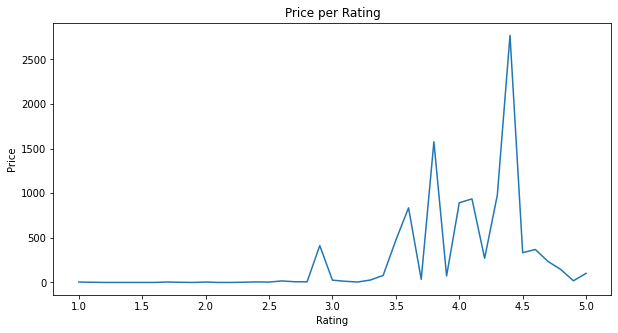

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_rating=df_non_dup_non_na_data.groupby('Rating').sum().reset_index()
fig, axes	= plt.subplots(figsize=(10,5))
plt.plot(df_rating['Rating'],df_rating['Price'])
axes.set_xlabel('Rating')
axes.set_ylabel('Price')
axes.set_title('Price per Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


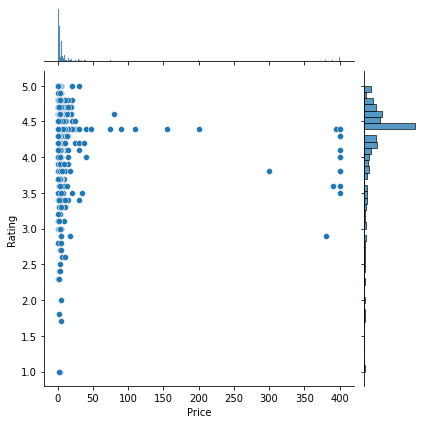

In [ ]:
paid_apps = df_non_dup_non_na_data[df_non_dup_non_na_data.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

Text(0.5, 1.0, 'Price per Installs')

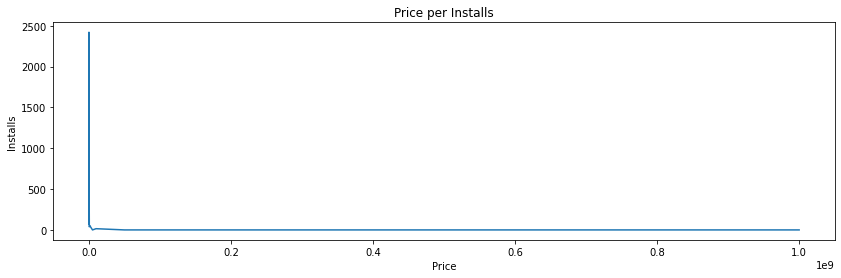

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_rating=df_non_dup_non_na_data.groupby('Installs').sum().reset_index()
fig, axes	= plt.subplots(figsize=(14,4))
plt.plot(df_rating['Installs'],df_rating['Price'])
axes.set_ylabel('Installs')
axes.set_xlabel('Price')
axes.set_title('Price per Installs')

Text(0.5, 1.0, 'Price VS Installs')

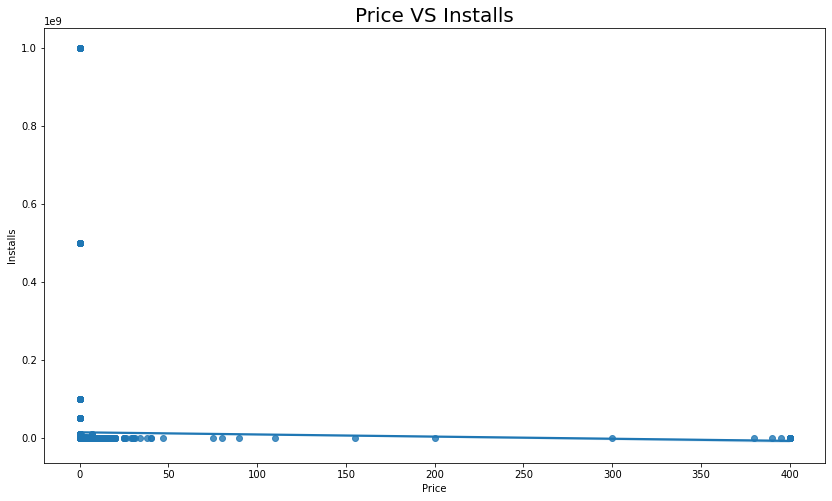

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Installs", data=df_non_dup_non_na_data[['Installs','Price']])
plt.title("Price VS Installs", size=20)

Which are most expensive and inexpensive apps and name their correponding categories.

In [ ]:
df_non_dup_non_na_data['Price'].max()

400.0

In [ ]:
df_non_dup_non_na_data['Price'].min()

0.0

In [ ]:
df_non_dup_non_na_data.loc[df_non_dup_non_na_data['Price'].max(),'App']

'Text SMS'

In [ ]:
df_non_dup_non_na_data.loc[df_non_dup_non_na_data['Price'].min(),'App']

'Photo Editor & Candy Camera & Grid & ScrapBook'

In [ ]:
df_non_dup_non_na_data.loc[df_non_dup_non_na_data['Price'].max(),'Category']

'COMMUNICATION'

In [ ]:
df_non_dup_non_na_data.loc[df_non_dup_non_na_data['Price'].min(),'Category']

'ART_AND_DESIGN'

In [ ]:
df_non_dup_non_na_data.groupby('Category').agg({'Price':'max'})


,Price
Category,
ART_AND_DESIGN,1.99
AUTO_AND_VEHICLES,9.99
BEAUTY,0.00
BOOKS_AND_REFERENCE,6.49
BUSINESS,89.99
COMICS,0.00
COMMUNICATION,19.99
DATING,7.99
EDUCATION,5.99


so now we can conclude that most expenive app is 'Text SMS' with price 400 within COMMUNICATION category while most inexpenive app is 'Photo Editor & Candy Camera & Grid & ScrapBook' with price 0 within ART_AND_DESIGN category.

In [ ]:
df_non_dup_non_na_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


**Comparison between sentiment factors**

In [ ]:
df_non_dup_non_na_reviews['Sentiment'].value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

Text(0, 0.5, 'sentiment')

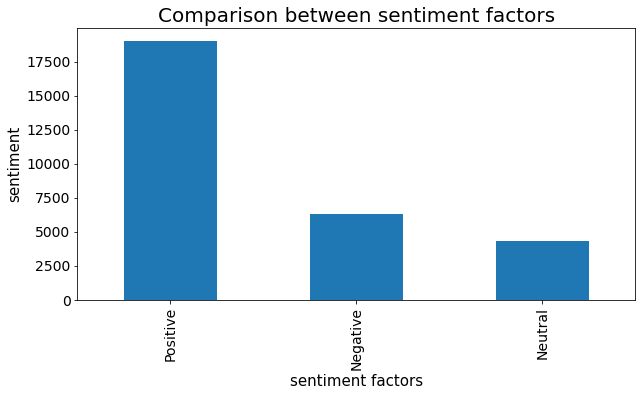

In [ ]:
ax = df_non_dup_non_na_reviews['Sentiment'].value_counts().plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Comparison between sentiment factors", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("sentiment factors", fontsize = 15)
ax.set_ylabel("sentiment", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


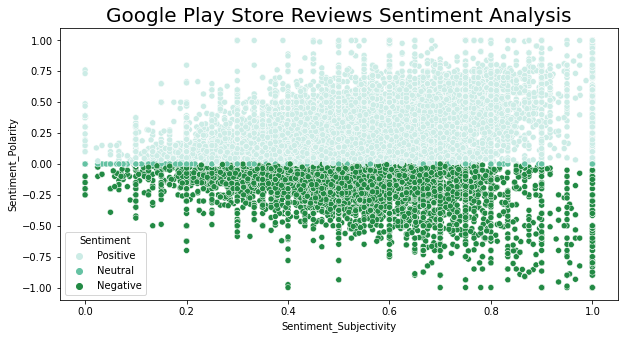

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_non_dup_non_na_reviews['Sentiment_Subjectivity'], df_non_dup_non_na_reviews['Sentiment_Polarity'],
                hue = df_non_dup_non_na_reviews['Sentiment'], edgecolor='white', palette="BuGn")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()


**Number of Installed apps in Play store**


Text(0.5, 1.0, 'Total app installs in each category')

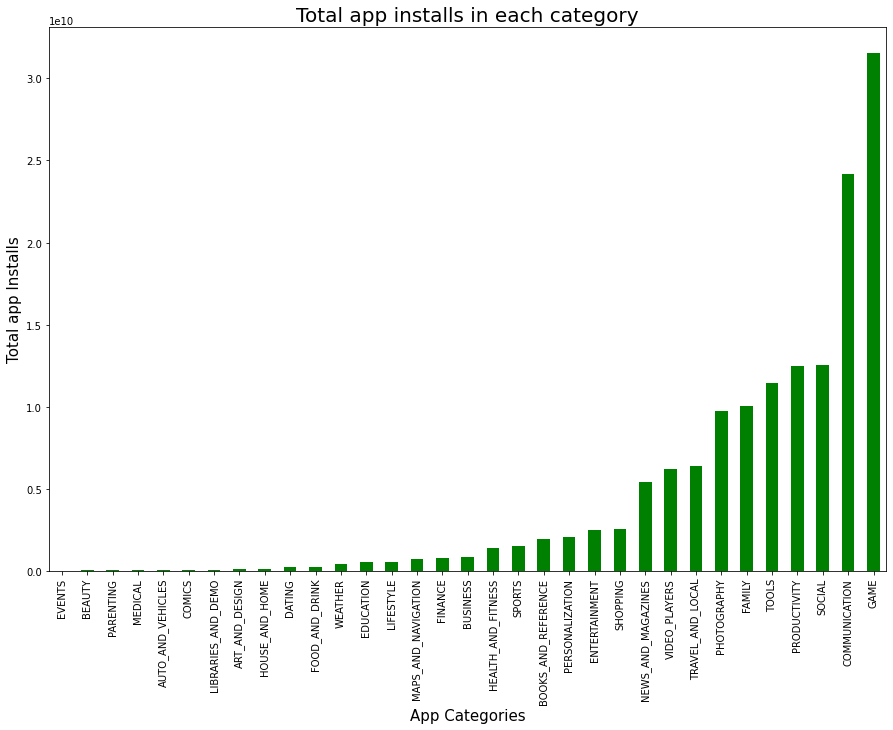

In [ ]:
# # Highest number of installed apps in each category
# variable = df_data.groupby(['Category'])['Installs'].sum().sort_values()
# variable.plot.bar(figsize=(15,10), color = 'g', )
# plt.ylabel('Total app Installs', fontsize = 15)
# plt.xlabel('App Categories', fontsize = 15)
# plt.title('Total app installs in each category', fontsize = 20)

In [ ]:
x = df_data['Category'].value_counts().index
y = df_data['Category'].value_counts()
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])


Now we plot the graph with the help of seaborn and taking Number of Apps on X axis and App Categories on Y axis.

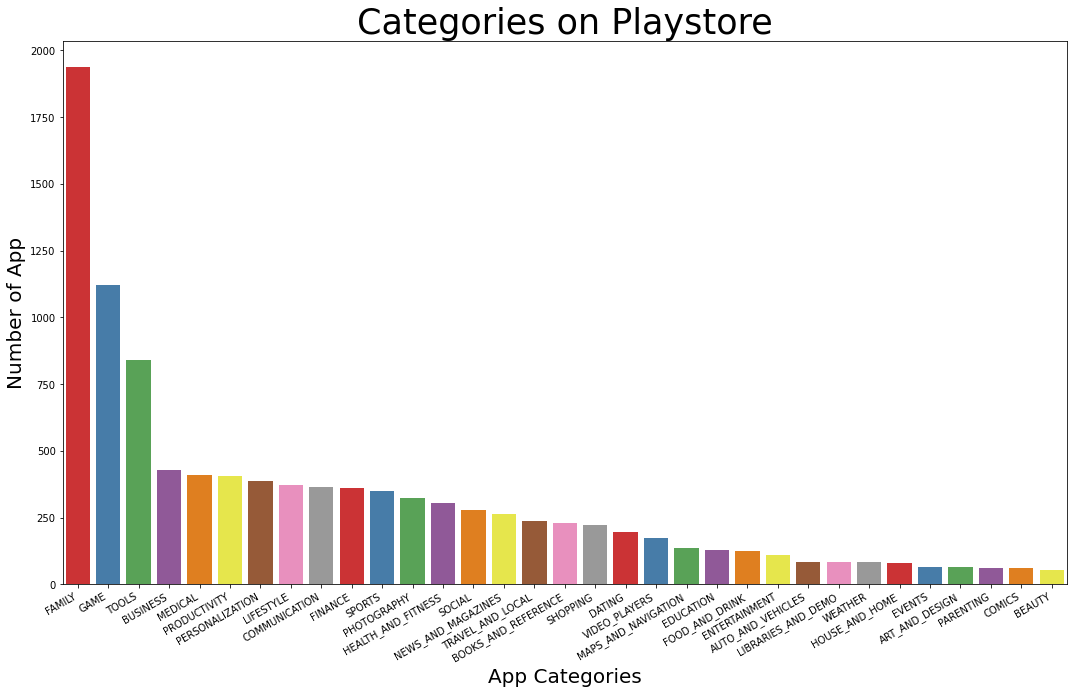

In [ ]:
plt.figure(figsize=(18,10))
plt.xlabel('App Categories', size=20)
plt.ylabel('Number of App', size=20)
graph = sns.barplot(x = x_axis, y = y_axis,palette = "Set1")
graph.set_title("Categories on Playstore", fontsize = 35)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30, horizontalalignment='right');

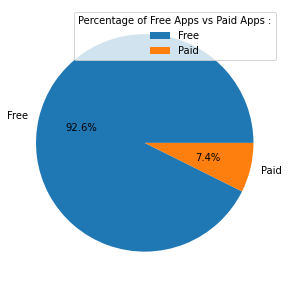

In [ ]:
plt.pie(df_data['Type'].value_counts(), labels = df_data['Type'].unique(),autopct='%1.1f%%',)
plt.legend(title = "Percentage of Free Apps vs Paid Apps :")
plt.show()

# Inference

From the above pie chart, we can conclude that most of the apps on google play store are free(Approx 92%)

Text(0, 0.5, 'Rating')

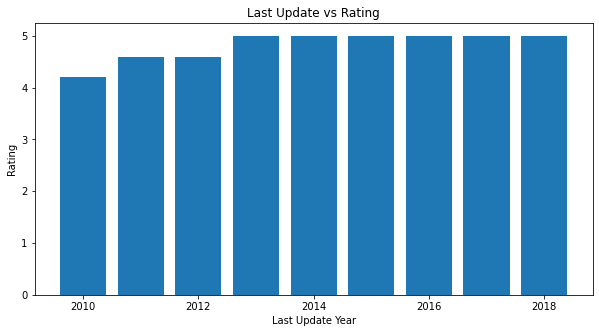

In [ ]:
# # Plotting bar plot to visualize how rating affect with app last updated year.
# fig = plt.figure(figsize = (10, 5))

# x= [i.year for i in list(df_data["Last Updated"])]
# y= [j for j in list(df_data["Rating"])]

# plt.bar(x,y)
# plt.title("Last Update vs Rating")
# plt.xlabel("Last Update Year")
# plt.ylabel("Rating")

**Let' merge two data set.**

In [ ]:
df_merge= pd.merge(df_data, df_reviews, on="App", how="inner")
df_merge.shape

(40414, 17)

In [ ]:
df_merge.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.068981,0.200414,0.008485,-0.018775,0.075466,0.071492
Reviews,0.068981,1.000000,0.487591,0.560574,-0.019947,-0.094489,-0.007703
Size,0.200414,0.487591,1.000000,0.252087,-0.031521,-0.188011,0.007689
Installs,0.008485,0.560574,0.252087,1.000000,-0.023349,-0.053921,-0.004637
Price,-0.018775,-0.019947,-0.031521,-0.023349,1.000000,0.022010,-0.000581
Sentiment_Polarity,0.075466,-0.094489,-0.188011,-0.053921,0.022010,1.000000,0.244832
Sentiment_Subjectivity,0.071492,-0.007703,0.007689,-0.004637,-0.000581,0.244832,1.000000


**Correlation Heatmap on merged dataframe.**

Text(0.5, 1.0, 'Correlation Heatmap for Playstore data and User review data')

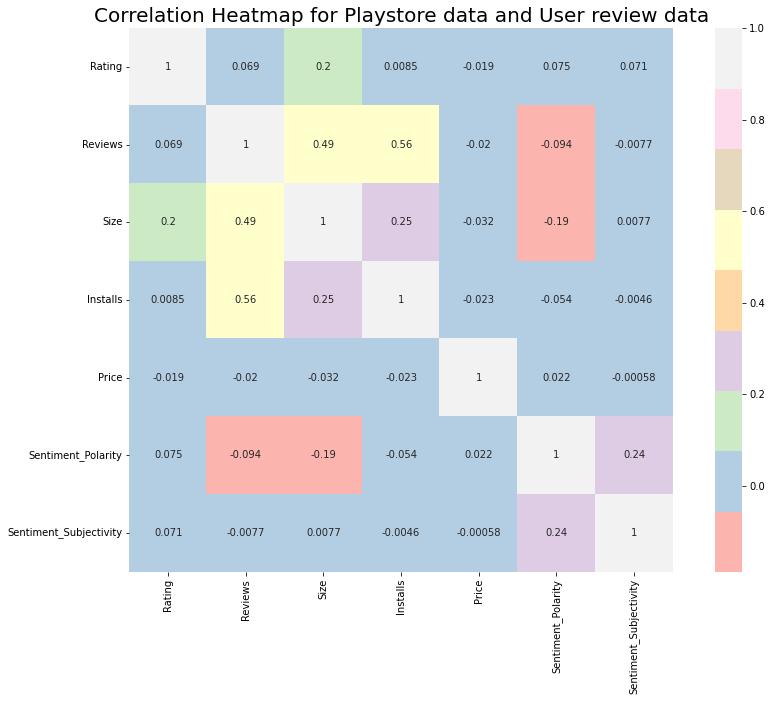

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df_merge.corr(),annot= True,cmap=sns.color_palette('Pastel1'),square=True)
plt.title('Correlation Heatmap for Playstore data and User review data', size=20)

1. Size and sentiment polarity are negatively correlated(-0.19). There may be a reason when the size of an app increases people start disliking the app because it consumes more storage, takes more RAM and needs a high speed connection for its execution.
2.There is a positive correlation between reviews and number of installs(0.56) because as the reviews increase, people start noticing the app and install them.
3.There is slightly positive correlation(0.24) between sentiment polarity and sentiment subjectivity that means if users share the positive reviews (sentiment polarity) then there is much chances that users are sharing their personal opinion and not a factual information(Sentiment Subjectivity)

**HOW DOES APP RATING AFFECT THE APPLICATION**

After witnessing the market share for each category of apps, let's see how all these apps perform on an average. App ratings on a scale of 1 to 5, it shows company's overall brand image. Ratings are a key performance indicator of an app.

The analysing of app ratings is important because, this only gives the information how much an app is liked or disliked by the people. So that we have plotted the histrogram for Ratings it shows the category wise avg rating.

From our observation, we found that the average volume of ratings across all app categories is 4.217.In the histogram plot majority of the apps are highly rated with only a few exceptions in the low-rated apps.

**HOW DOES APP RATING AFFECT THE APPLICATION**

After witnessing the market share for each category of apps, let's see how all these apps perform on an average. App ratings on a scale of 1 to 5, it shows company's overall brand image. Ratings are a key performance indicator of an app.

The analysing of app ratings is important because, this only gives the information how much an app is liked or disliked by the people. So that we have plotted the histrogram for Ratings it shows the category wise avg rating.

Average Rating 4.21788130678523


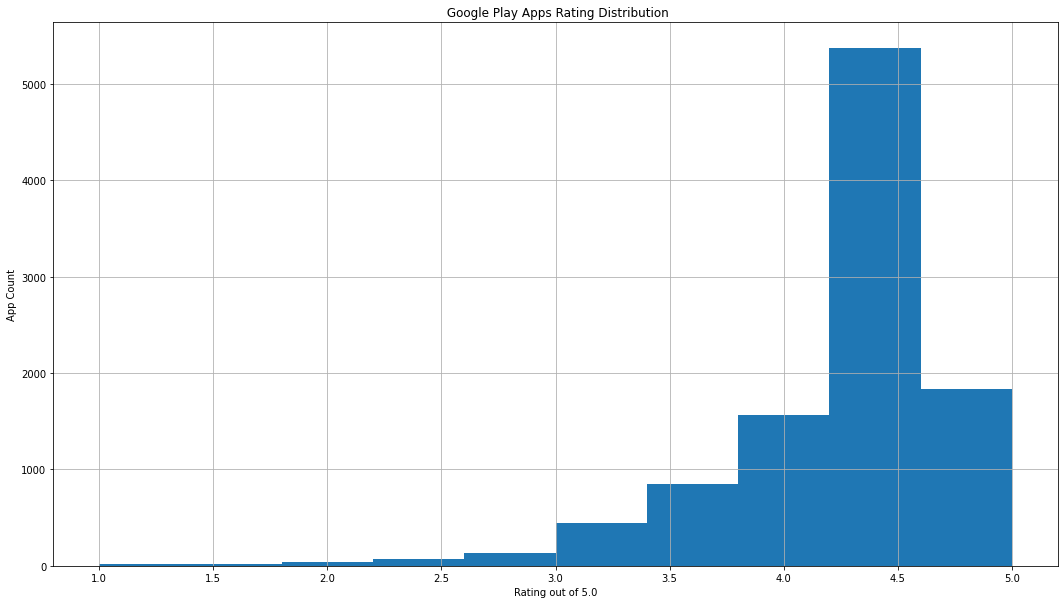

In [ ]:
#Plot a histogram from the Rating column
plt.figure(figsize=(18,10))
print(f"Average Rating {df_data['Rating'].mean()}")

df_data["Rating"].hist()
plt.title(" Google Play Apps Rating Distribution")
plt.ylabel("App Count")
plt.xlabel("Rating out of 5.0")
plt.show()

From our observation, we found that the average volume of ratings across all app categories is 4.217.In the histogram plot majority of the apps are highly rated with only a few exceptions in the low-rated apps.

 ***what is the Relation between app category and app price***

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform. Lets plot a graph and see.

Here we are selecting some most popular app category from the data set for our analysis i.e GAME, FAMILY, PHOTOGRAPHY, MEDICAL, TOOLS, FINANCE, LIFESTYLE , BUSINESS

Text(0.5, 1.0, 'App pricing trend across categories')

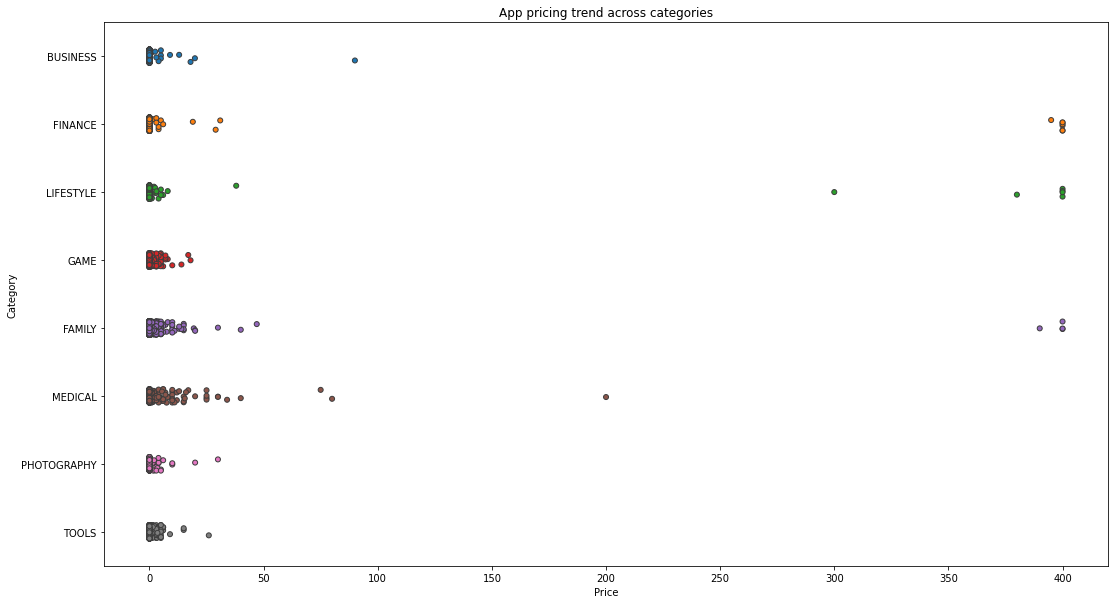

In [ ]:
graph, plot = plt.subplots()
graph.set_size_inches(18,10)
popular_app= df_data[df_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
plot = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], jitter=True, linewidth=1)
plot.set_title('App pricing trend across categories')




* Many factors to be consider when selecting the right pricing strategy for your mobile app. It is important to reevaluate the app price before entring the market.Is it worth the pice or not.

* Here we can see that Different categories apps demand different price ranges. Some apps that are simple and easy are free, where as apps in category FAMILY LIFESTYLE FINANCE and MEDICAL are high in price.

* All Game apps are comparetively low in price, may be thats the reason game apps have more number of downloads, as we have seen earlier.   

**Mostly which genre people love to watch?**

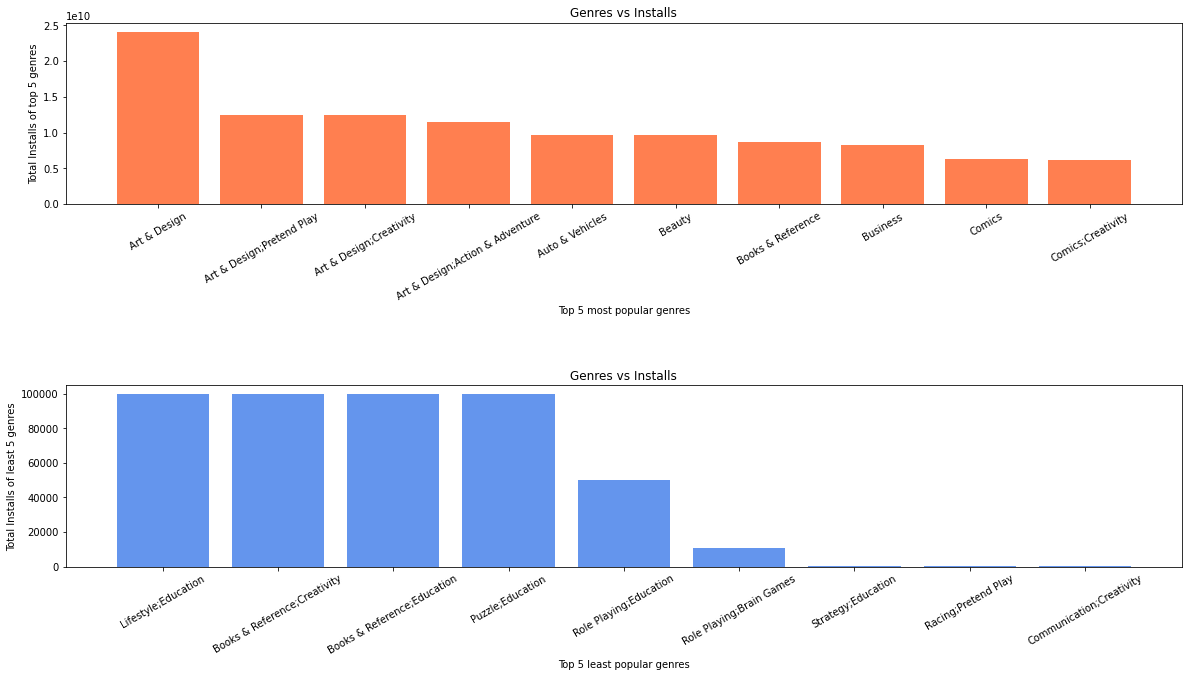

In [ ]:
#First bar plot
fig = plt.figure(figsize = (20, 10))
y1= df_data.groupby(["Genres"])["Installs"].sum().sort_values(ascending=False)[0:10]
x1= df_data["Genres"].unique()[0:10]

plt.subplot(2,1,1)
plt.bar(x1,y1, color= "Coral")
plt.title("Genres vs Installs")
plt.xlabel("Top 5 most popular genres")
plt.ylabel("Total Installs of top 5 genres")
plt.xticks(rotation=30)

#Second bar plot
y2= df_data.groupby(["Genres"])["Installs"].sum().sort_values(ascending=False)[-10:-1]
x2= df_data["Genres"].unique()[-10:-1]

plt.subplot(2,1,2)
plt.bar(x2,y2,color= "CornflowerBlue")
plt.title("Genres vs Installs")
plt.xlabel("Top 5 least popular genres")
plt.ylabel("Total Installs of least 5 genres")
plt.xticks(rotation=30)

plt.subplots_adjust(hspace=1)

#Pair Plot

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Price')

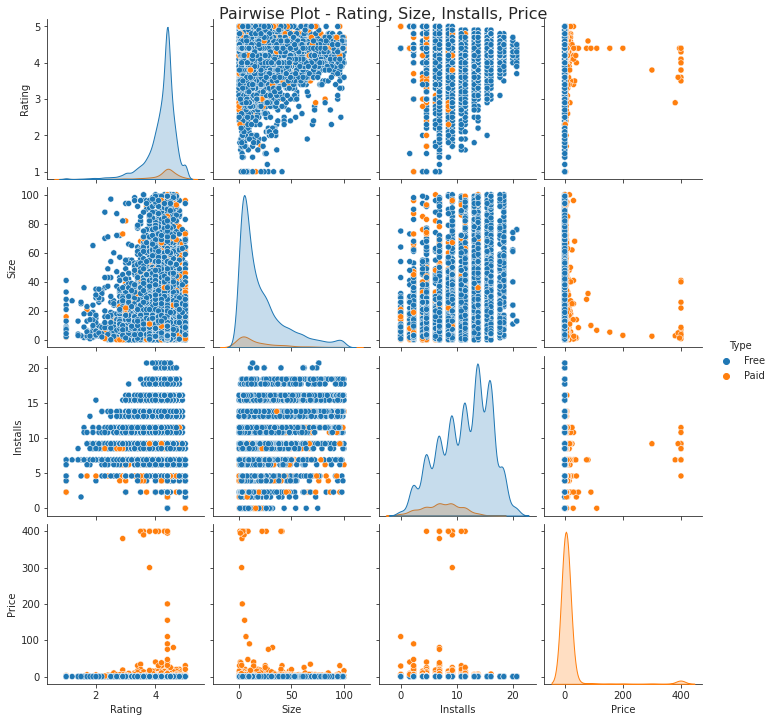

In [ ]:
Rating = df_data['Rating']
Size = df_data['Size']
Installs = df_data['Installs']
Type = df_data['Type']
Price = df_data['Price']

df_pairplot = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Price','Type']), hue='Type')
df_pairplot.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Price",x=0.5, y=1.0, fontsize=16)